# Importation des bibliothèques nécessaires

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats
from datetime import datetime,timedelta

# Récupération et traitement des données

C:\Users\julie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


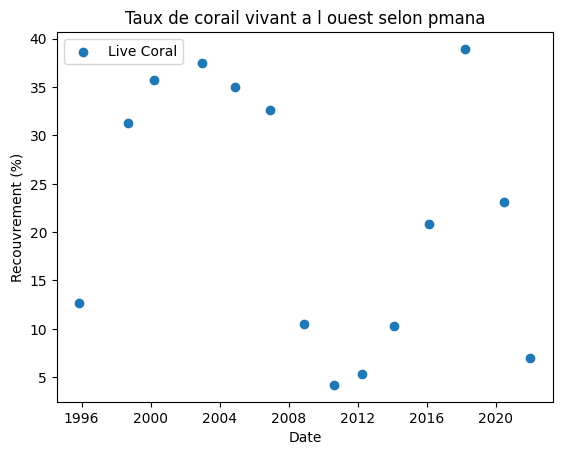

In [29]:
pmana = pd.read_excel('donnees corail/Pmana.xlsx')
pmana.replace(-99,np.nan,inplace=True)
pmana=pmana[pmana['île'].isin(['moorea','Moorea'])]
pmana['date'] = pmana['date'].astype('datetime64[ns]')
pmana_a = pmana[pmana['genre'].isin(['Algue Halimeda','Algue Asparagopsis','Algue autre','Algue Turbinaria','Algue Lobophora','Algue Padina',' Algue Dictyota'])]
pmana= pmana[~pmana['genre'].isin(['Algue Halimeda','Algue Asparagopsis','Algue autre','Algue Turbinaria','Algue Lobophora','Algue Padina',' Algue Dictyota'])]
pmana=pmana.groupby(['site','date','n° quadrat'])['recouvrement %'].sum().reset_index()
pmana=pmana.groupby(['site','date'])['recouvrement %'].mean().reset_index()
pmana_n=pmana[(pmana['site']=='e2b')|(pmana['site']=='tiahura34')].reset_index()
pmana_n['date'] = pmana_n['date'].astype('datetime64[ns]')
pmana_n = pmana_n.rename(columns={'date':'DateTime'})
pmana_w=pmana[pmana['site']=='haapiti'].reset_index()
pmana_w['date'] = pmana_w['date'].astype('datetime64[ns]')
pmana_w = pmana_w.rename(columns={'date':'DateTime'})
plt.scatter(pmana_w['DateTime'], pmana_w['recouvrement %'], label = 'Live Coral')
plt.title('Taux de corail vivant a l ouest selon pmana')
plt.xlabel('Date')
plt.ylabel('Recouvrement (%)')
plt.legend()

Algues ?

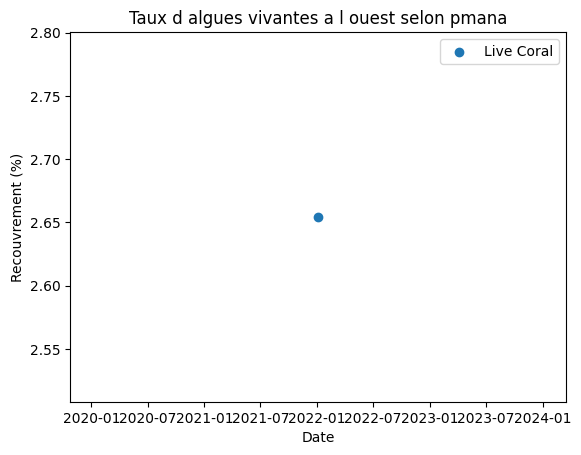

In [30]:
pmana_a=pmana_a.groupby(['site','date','n° quadrat'])['recouvrement %'].sum().reset_index()
pmana_a=pmana_a.groupby(['site','date'])['recouvrement %'].mean().reset_index()
pmana_an=pmana_a[(pmana_a['site']=='e2b')|(pmana_a['site']=='tiahura34')].reset_index()
pmana_an['date'] = pmana_an['date'].astype('datetime64[ns]')
pmana_an = pmana_an.rename(columns={'date':'DateTime'})
pmana_aw=pmana_a[pmana_a['site']=='haapiti'].reset_index()
pmana_aw['date'] = pmana_aw['date'].astype('datetime64[ns]')
pmana_aw = pmana_aw.rename(columns={'date':'DateTime'})
plt.scatter(pmana_aw['DateTime'], pmana_aw['recouvrement %'], label = 'Live Coral')
plt.title('Taux d algues vivantes a l ouest selon pmana')
plt.xlabel('Date')
plt.ylabel('Recouvrement (%)')
plt.legend()

In [31]:
amp = pd.read_excel('donnees corail/mpa2.xlsx')
amp.replace(-99,np.nan,inplace=True)
amp['recouvrement %']=amp['proportion']*100
amp.drop(columns=['proportion'],inplace=True)
amp=amp[amp['Substrate'].isin(['Montipora', 'Porites','Acropora', 'Leptastrea', 'Pocillopora' ,'Pavona','Millepora' ,'Astrea curta', 'Psammocora','Astreopora', 'Herpolitha','Fungia' ,'Acanthastrea'
 ,'Cyphastrea', 'Synarea' ,'tailleapopora' ,'Goniastrea stelligera','Gardineroseris' ,'Lobophyllia', 'Corail non identifié','Coscinaraea', 'Leptoseris', 'Corail mou' ,'pocillopora'])]
amp=amp.groupby(['Date','Transect','Habitat','Marine Area'])['recouvrement %'].sum().reset_index()
amp=amp.groupby(['Marine Area','Date','Habitat'])['recouvrement %'].mean().reset_index()
amp_n=amp[(amp['Marine Area']=='Tiahura')|(amp['Marine Area']=='Entre 2 baies')|(amp['Marine Area']=='Pihaena')|(amp['Marine Area']=='Aroa')]
amp_nb=amp_n[amp_n['Habitat']=='Barrier reef'].reset_index()
amp_nb['DC coral']=amp['recouvrement %'].diff()
amp_nb['Date'] = amp_nb['Date'].astype('datetime64[ns]')
amp_nb = amp_nb.rename(columns={'Date':'DateTime'})
amp_no=amp_n[amp_n['Habitat']=='Outer slope'].reset_index()
amp_no['DC coral']=amp['recouvrement %'].diff()
amp_no['Date'] = amp_no['Date'].astype('datetime64[ns]')
amp_no = amp_no.rename(columns={'Date':'DateTime'})
amp_no=amp_no.groupby(['DateTime'])['recouvrement %'].mean().reset_index()
amp_nf=amp_n[amp_n['Habitat']=='Fringing reef'].reset_index()
amp_nf['DC coral']=amp['recouvrement %'].diff()
amp_nf['Date'] = amp_nf['Date'].astype('datetime64[ns]')
amp_nf = amp_nf.rename(columns={'Date':'DateTime'})
amp_w=amp[(amp['Marine Area']=='Gendron')|(amp['Marine Area']=='Tetaiuo')|(amp['Marine Area']=='Taotaha')|(amp['Marine Area']=='Haapiti')]
amp_wb=amp_w[amp_w['Habitat']=='Barrier reef'].reset_index()
amp_wb['DC coral']=amp['recouvrement %'].diff()
amp_wb['Date'] = amp_wb['Date'].astype('datetime64[ns]')
amp_wb = amp_wb.rename(columns={'Date':'DateTime'})
amp_wo=amp_w[amp_w['Habitat']=='Outer slope'].reset_index()
amp_wo['DC coral']=amp['recouvrement %'].diff()
amp_wo['Date'] = amp_wo['Date'].astype('datetime64[ns]')
amp_wo = amp_wo.rename(columns={'Date':'DateTime'})
amp_wo=amp_wo.groupby(['DateTime'])['recouvrement %'].mean().reset_index()
amp_wf=amp_w[amp_w['Habitat']=='Fringing reef'].reset_index()
amp_wf['DC coral']=amp['recouvrement %'].diff()
amp_wf['Date'] = amp_wf['Date'].astype('datetime64[ns]')
amp_wf = amp_wf.rename(columns={'Date':'DateTime'})
amp_e=amp[(amp['Marine Area']=='Maatea')|(amp['Marine Area']=='Afareaitu')|(amp['Marine Area']=='Motu Ahi')|(amp['Marine Area']=='Nuarei')|(amp['Marine Area']=='Temae')]
amp_eb=amp_e[amp_e['Habitat']=='Barrier reef'].reset_index()
amp_eb['DC coral']=amp['recouvrement %'].diff()
amp_eb['Date'] = amp_eb['Date'].astype('datetime64[ns]')
amp_eb = amp_eb.rename(columns={'Date':'DateTime'})
amp_eo=amp_e[amp_e['Habitat']=='Outer slope'].reset_index()
amp_eo['DC coral']=amp['recouvrement %'].diff()
amp_eo['Date'] = amp_eo['Date'].astype('datetime64[ns]')
amp_eo = amp_eo.rename(columns={'Date':'DateTime'})
amp_eo=amp_eo.groupby(['DateTime'])['recouvrement %'].mean().reset_index()
amp_ef=amp_e[amp_e['Habitat']=='Fringing reef'].reset_index()
amp_ef['DC coral']=amp['recouvrement %'].diff()
amp_ef['Date'] = amp_ef['Date'].astype('datetime64[ns]')
amp_ef = amp_ef.rename(columns={'Date':'DateTime'})

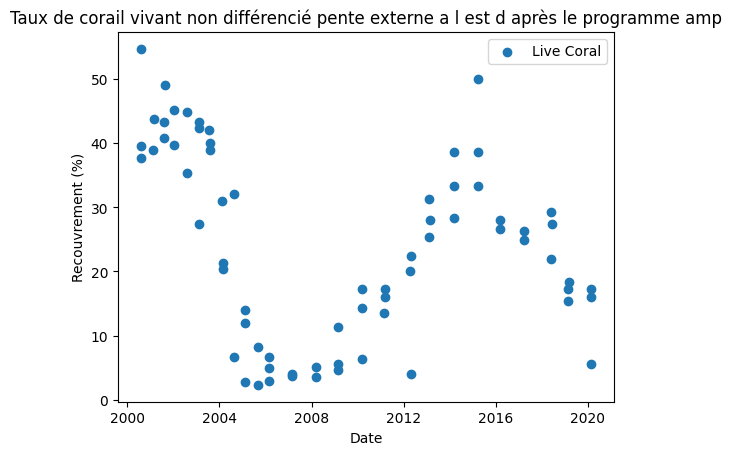

In [32]:
plt.scatter(amp_eo['DateTime'], amp_eo['recouvrement %'], label = 'Live Coral')
plt.title('Taux de corail vivant non différencié pente externe a l est d après le programme amp')
plt.xlabel('Date')
plt.ylabel('Recouvrement (%)')
plt.legend()
plt.savefig('output/Données corail/mpa est')

# Combiner les données de pmana et amp ?

In [33]:
n_o=amp_no.merge(pmana_n, on=['DateTime','recouvrement %'],how='outer')

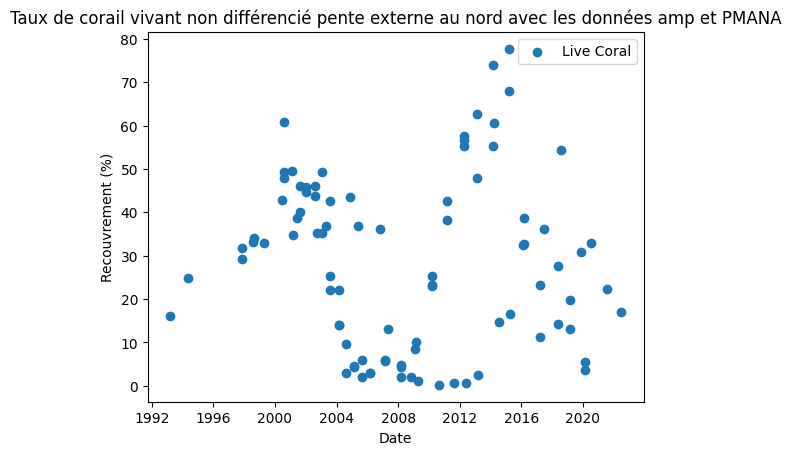

In [34]:
plt.scatter(n_o['DateTime'], n_o['recouvrement %'], label = 'Live Coral')
plt.title('Taux de corail vivant non différencié pente externe au nord avec les données amp et PMANA')
plt.xlabel('Date')
plt.ylabel('Recouvrement (%)')
plt.legend()
plt.savefig('output/Données corail/amp nord combiné')

In [35]:
w_o=amp_wo.merge(pmana_w, on=['DateTime','recouvrement %'],how='outer')

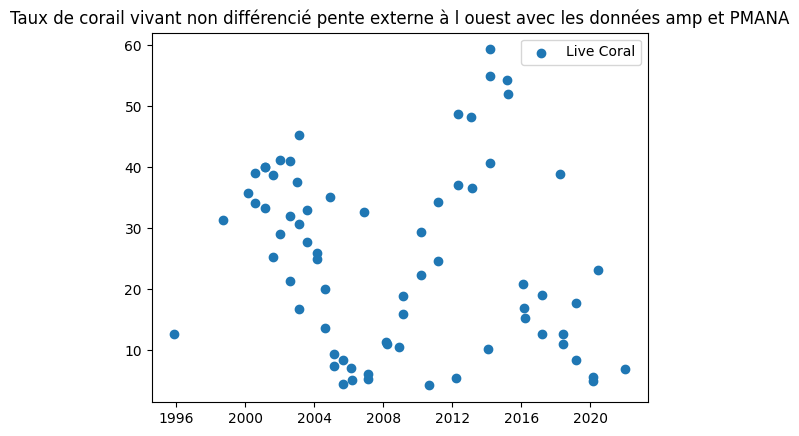

In [36]:
plt.scatter(w_o['DateTime'], w_o['recouvrement %'], label = 'Live Coral')
plt.title('Taux de corail vivant non différencié pente externe à l ouest avec les données amp et PMANA')
plt.legend()
plt.savefig('output/Données corail/mpa west combiné')

Conclusion : impossible de mélanger les 2 programmes

# Interpoler les donnée

amp - EST

In [37]:
#Enlever deux valeurs aberrantes
amp_eo=amp_eo[(amp_eo['DateTime']!='2010-03-06')&(amp_eo['DateTime']!='2012-04-25')].reset_index()

In [38]:
def days_since_1990(date):
     ####  donne le nombre de jours entre le 01/01/1990 et la date donnée

    #### cette fonction prend la variable suivante en entrée :
    # date = la date à étudier
    
    #### et en sortie :
    # delta.days = le nombre de jours écoulés
    reference_date = datetime(1990, 1, 1)
    delta = date - reference_date
    return delta.days

def date_from_days(days_since_1990):
         ####  fonction inverse de la fonction days_since_1990

    #### cette fonction prend la variable suivante en entrée :
    # days_since_1990 = le nombre de jours écoulés depuis le 01/01/1990
    
    #### et en sortie :
    # result_date = la date correspondante
    reference_date = datetime(1990, 1, 1)
    days_since_1990=int(days_since_1990)
    result_date = reference_date + timedelta(days=days_since_1990)
    return result_date

In [39]:
amp_eo['dates']=0
taille=amp_eo.shape[0]
for i in range(taille):
    amp_eo.loc[i,'dates'] = days_since_1990(amp_eo.loc[i,'DateTime'])
ecart_d = amp_eo['dates'].max()-amp_eo['dates'].min()

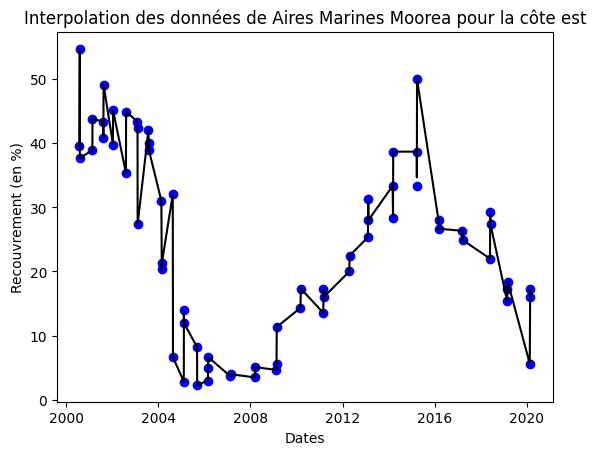

In [40]:
amp_eo['DateTime'], amp_eo['recouvrement %']
x_value = amp_eo['dates'].to_numpy()
y_value =  amp_eo['recouvrement %'].to_numpy()
function = scipy.interpolate.interp1d(x_value, y_value)
x_new = np.linspace(amp_eo['dates'].min(),amp_eo['dates'].max(),ecart_d)
y_new=function(x_new)
x_new_dates = []
for i in range (len(x_new)):
    x_new_dates.append(date_from_days(x_new[i]))
plt.scatter(amp_eo['DateTime'], y_value, color="blue")
plt.plot(x_new_dates, y_new, color="black")
plt.ylabel("Recouvrement (en %)")
plt.xlabel("Dates")
plt.title("Interpolation des données de Aires Marines Moorea pour la côte est")
plt.savefig('output/Données corail/interpolation sans correction')
plt.show()

In [41]:
def moving_average(data, window_size):
         ####  renvoie la moyenne glissante

    #### cette fonction prend les variables suivantes en entrée :
    # data = la série temporelle à laquelle on veut appliquer la fenêtre glissante
    # window_size = la taille de la fenêtre choisie
    
    #### et en sortie :
    # la moyenne glissance    
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Paramètre de la moyenne mobile 
window_size = 365

x = np.array(y_new)

x_smoothed = moving_average(x.squeeze(), window_size)

Text(0.5, 1.0, 'Évolution du recouvrement à l est d apres amp')

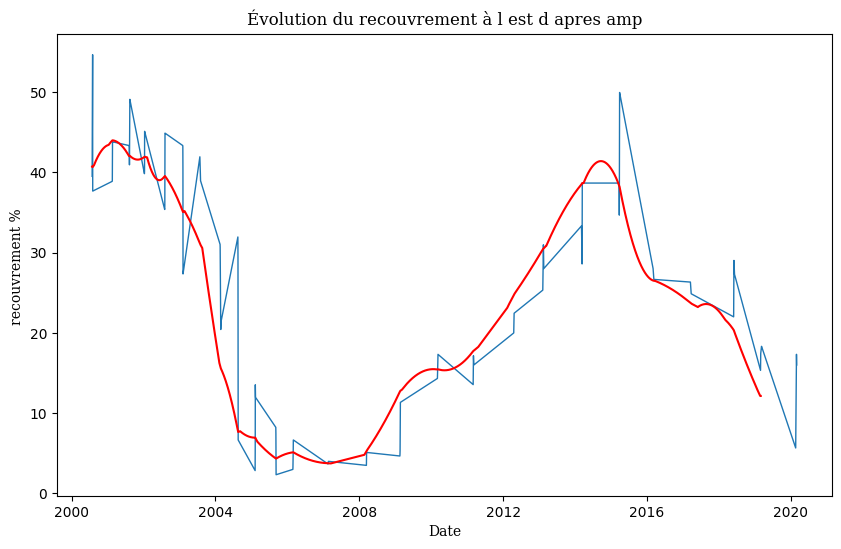

In [42]:
plt.figure(figsize = (10, 6))
plt.plot(x_new_dates, y_new, linewidth = 1)
plt.plot(x_new_dates[:x.shape[0] - window_size+1], x_smoothed, label = 'moyenne glissante', color = 'r')
plt.xlabel('Date', fontfamily = 'serif')
plt.ylabel('recouvrement % ',  fontfamily = 'serif')
plt.title('Évolution du recouvrement à l est d apres amp',  fontfamily = 'serif')

In [43]:
recouvrement_corr = pd.DataFrame({'DateTime':x_new_dates[:x.shape[0] - window_size+1],'recouvrement corr %':x_smoothed})
amp_eo=amp_eo.merge(recouvrement_corr, on='DateTime')
amp_eo.drop(columns=['index','dates'], inplace = True)

In [44]:
recouvrement_corr.to_csv('donnees corail/amp_eo.csv', index = False)

amp OUEST

In [45]:
amp_wo['dates']=0
taille=amp_wo.shape[0]
for i in range(taille):
    amp_wo.loc[i,'dates'] = days_since_1990(amp_wo.loc[i,'DateTime'])
ecart_d = amp_wo['dates'].max()-amp_wo['dates'].min()

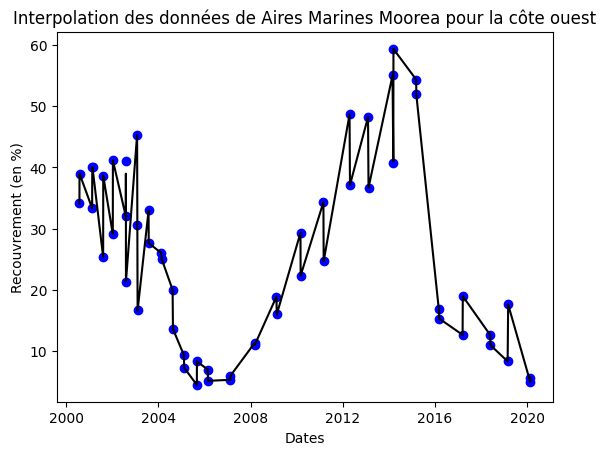

In [46]:
x_value = amp_wo['dates'].to_numpy()
y_value =  amp_wo['recouvrement %'].to_numpy()

function = scipy.interpolate.interp1d(x_value, y_value)
x_new = np.linspace(amp_wo['dates'].min(),amp_wo['dates'].max(),ecart_d)
y_new=function(x_new)
x_new_dates = []
for i in range (len(x_new)):
    x_new_dates.append(date_from_days(x_new[i]))
plt.scatter(amp_wo['DateTime'], y_value, color="blue")
plt.plot(x_new_dates, y_new, color="black")
plt.ylabel("Recouvrement (en %)")
plt.xlabel("Dates")
plt.title("Interpolation des données de Aires Marines Moorea pour la côte ouest")
plt.show()

In [47]:
x = np.array(y_new)
# Appliquer la moyenne mobile
x_smoothed = moving_average(x.squeeze(), window_size)

Text(0.5, 1.0, 'Évolution du recouvrement à l ouest d apres amp')

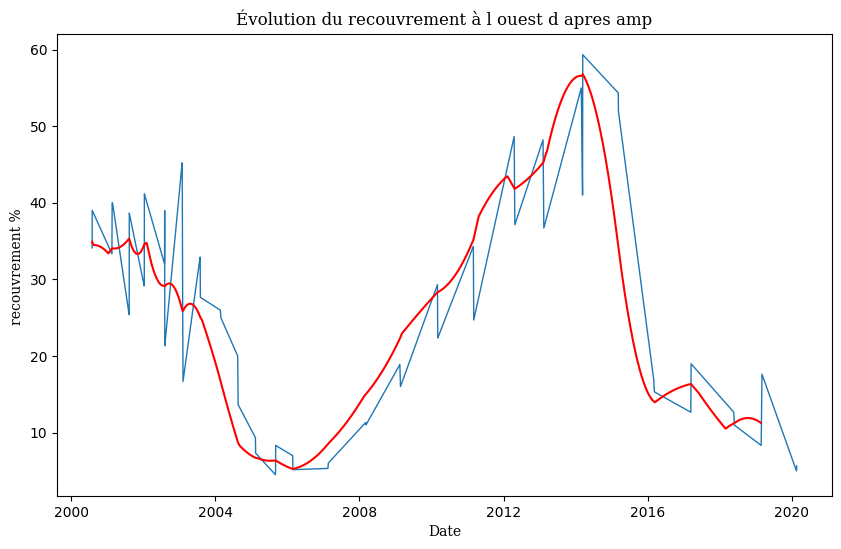

In [48]:
plt.figure(figsize = (10, 6))
plt.plot(x_new_dates, y_new, linewidth = 1)
plt.plot(x_new_dates[:x.shape[0] - window_size+1], x_smoothed, label = 'moyenne glissante', color = 'r')
plt.xlabel('Date', fontfamily = 'serif')
plt.ylabel('recouvrement % ',  fontfamily = 'serif')
plt.title('Évolution du recouvrement à l ouest d apres amp',  fontfamily = 'serif')

In [49]:
recouvrement_corr = pd.DataFrame({'DateTime':x_new_dates[:x.shape[0] - window_size+1],'recouvrement corr %':x_smoothed})
amp_wo=amp_wo.merge(recouvrement_corr, on='DateTime')
amp_wo.drop(columns=['dates'], inplace = True)

In [50]:
recouvrement_corr.to_csv('donnees corail/amp_wo.csv', index = False)

amp NORD

In [51]:
amp_no['dates']=0
taille=amp_no.shape[0]
for i in range(taille):
    amp_no.loc[i,'dates'] = days_since_1990(amp_no.loc[i,'DateTime'])
ecart_d = amp_no['dates'].max()-amp_no['dates'].min()

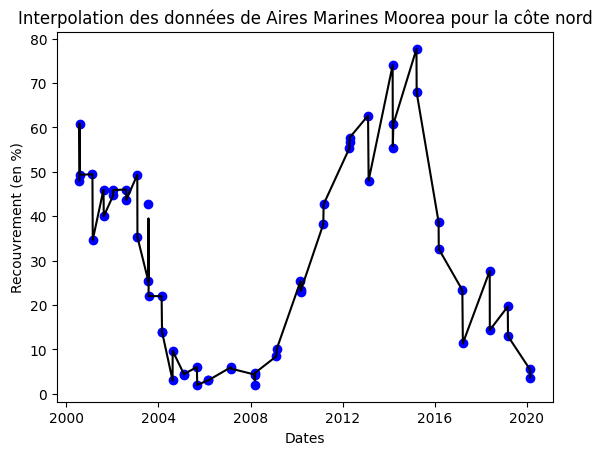

In [52]:
x_value = amp_no['dates'].to_numpy()
y_value =  amp_no['recouvrement %'].to_numpy()

function = scipy.interpolate.interp1d(x_value, y_value)
x_new = np.linspace(amp_no['dates'].min(),amp_no['dates'].max(),ecart_d)
y_new=function(x_new)
x_new_dates = []
for i in range (len(x_new)):
    x_new_dates.append(date_from_days(x_new[i]))
plt.scatter(amp_no['DateTime'], y_value, color="blue")
plt.plot(x_new_dates, y_new, color="black")
plt.ylabel("Recouvrement (en %)")
plt.xlabel("Dates")
plt.title("Interpolation des données de Aires Marines Moorea pour la côte nord")
plt.show()

In [53]:
x = np.array(y_new)

# Appliquer la moyenne mobile
x_smoothed = moving_average(x.squeeze(), window_size)

Text(0.5, 1.0, 'Évolution du recouvrement au nord d apres amp')

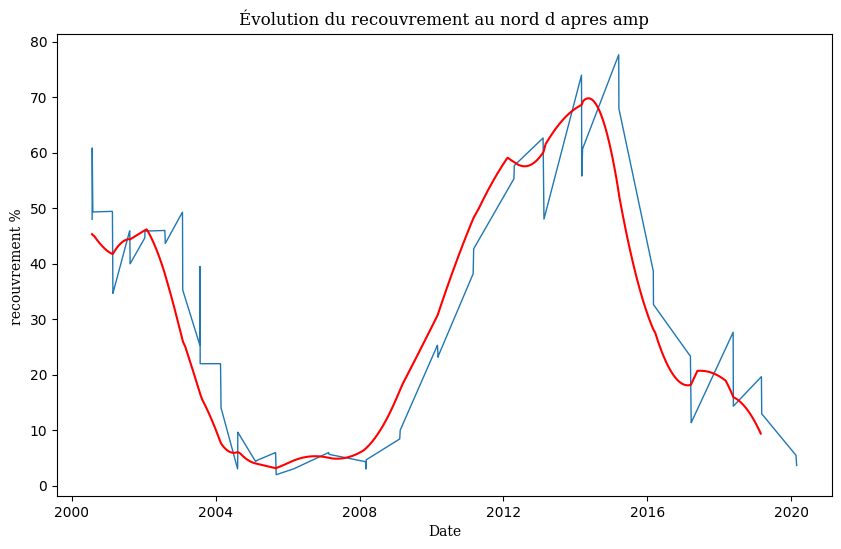

In [54]:
plt.figure(figsize = (10, 6))
plt.plot(x_new_dates, y_new, linewidth = 1)
plt.plot(x_new_dates[:x.shape[0] - window_size+1], x_smoothed, label = 'moyenne glissante', color = 'r')
plt.xlabel('Date', fontfamily = 'serif')
plt.ylabel('recouvrement % ',  fontfamily = 'serif')
plt.title('Évolution du recouvrement au nord d apres amp',  fontfamily = 'serif')

In [55]:
recouvrement_corr = pd.DataFrame({'DateTime':x_new_dates[:x.shape[0] - window_size+1],'recouvrement corr %':x_smoothed})
amp_no=amp_no.merge(recouvrement_corr, on='DateTime')
amp_no.drop(columns=['dates'], inplace = True)

In [56]:
recouvrement_corr.to_csv('donnees corail/amp_no.csv', index = False)

PMANA NORD

In [57]:
pmana_n['dates']=0
taille=pmana_n.shape[0]
for i in range(taille):
    pmana_n.loc[i,'dates'] = days_since_1990(pmana_n.loc[i,'DateTime'])
ecart_d = pmana_n['dates'].max()-pmana_n['dates'].min()

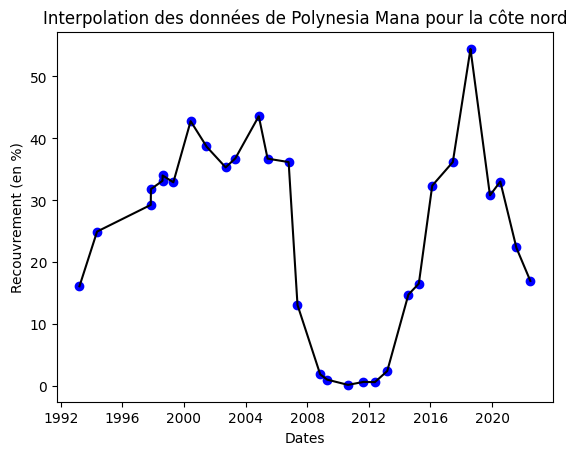

In [58]:
x_value = pmana_n['dates'].to_numpy()
y_value =  pmana_n['recouvrement %'].to_numpy()

function = scipy.interpolate.interp1d(x_value, y_value)
x_new = np.linspace(pmana_n['dates'].min(),pmana_n['dates'].max(),ecart_d)
y_new=function(x_new)
x_new_dates = []
for i in range (len(x_new)):
    x_new_dates.append(date_from_days(x_new[i]))
plt.scatter(pmana_n['DateTime'], y_value, color="blue")
plt.plot(x_new_dates, y_new, color="black")
plt.ylabel("Recouvrement (en %)")
plt.xlabel("Dates")
plt.title("Interpolation des données de Polynesia Mana pour la côte nord")
plt.show()

In [59]:
x = np.array(y_new)

# Appliquer la moyenne mobile
x_smoothed = moving_average(x.squeeze(), window_size)

Text(0.5, 1.0, 'Évolution du recouvrement au nord d apres polynesia mana')

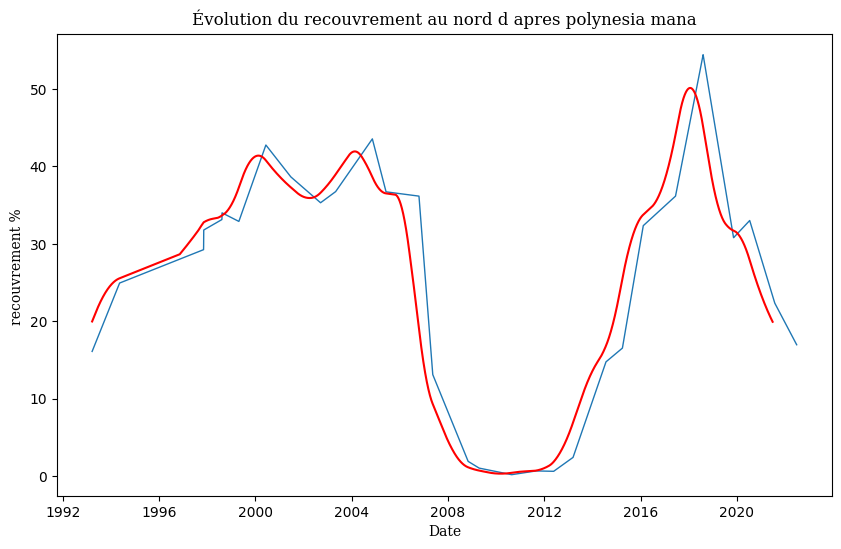

In [60]:
plt.figure(figsize = (10, 6))
plt.plot(x_new_dates, y_new, linewidth = 1)
plt.plot(x_new_dates[:x.shape[0] - window_size+1], x_smoothed, label = 'moyenne glissante', color = 'r')
plt.xlabel('Date', fontfamily = 'serif')
plt.ylabel('recouvrement % ',  fontfamily = 'serif')
plt.title('Évolution du recouvrement au nord d apres polynesia mana',  fontfamily = 'serif')

In [61]:
recouvrement_corr = pd.DataFrame({'DateTime':x_new_dates[:x.shape[0] - window_size+1],'recouvrement corr %':x_smoothed})
pmana_n=pmana_n.merge(recouvrement_corr, on='DateTime')
pmana_n.drop(columns=['site','index','dates'], inplace = True)

In [62]:
recouvrement_corr.to_csv('donnees corail/pmana_n.csv', index = False)

PMANA OUEST

In [63]:
pmana_w['dates']=0
taille=pmana_w.shape[0]
for i in range(taille):
    pmana_w.loc[i,'dates'] = days_since_1990(pmana_w.loc[i,'DateTime'])
ecart_d = pmana_w['dates'].max()-pmana_w['dates'].min()

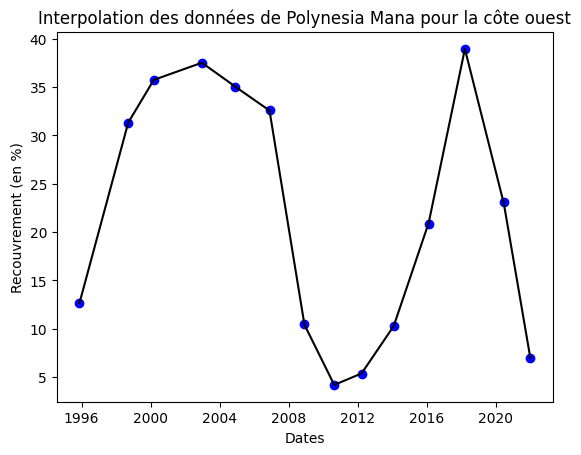

In [64]:
x_value = pmana_w['dates'].to_numpy()
y_value =  pmana_w['recouvrement %'].to_numpy()

function = scipy.interpolate.interp1d(x_value, y_value)
x_new = np.linspace(pmana_w['dates'].min(),pmana_w['dates'].max(),ecart_d)
y_new=function(x_new)
x_new_dates = []
for i in range (len(x_new)):
    x_new_dates.append(date_from_days(x_new[i]))
plt.scatter(pmana_w['DateTime'], y_value, color="blue")
plt.plot(x_new_dates, y_new, color="black")
plt.ylabel("Recouvrement (en %)")
plt.xlabel("Dates")
plt.title("Interpolation des données de Polynesia Mana pour la côte ouest")
plt.show()

In [65]:
x = np.array(y_new)

# Appliquer la moyenne mobile
x_smoothed = moving_average(x.squeeze(), window_size)

Text(0.5, 1.0, 'Évolution du recouvrement à l ouest d apres polynesia mana')

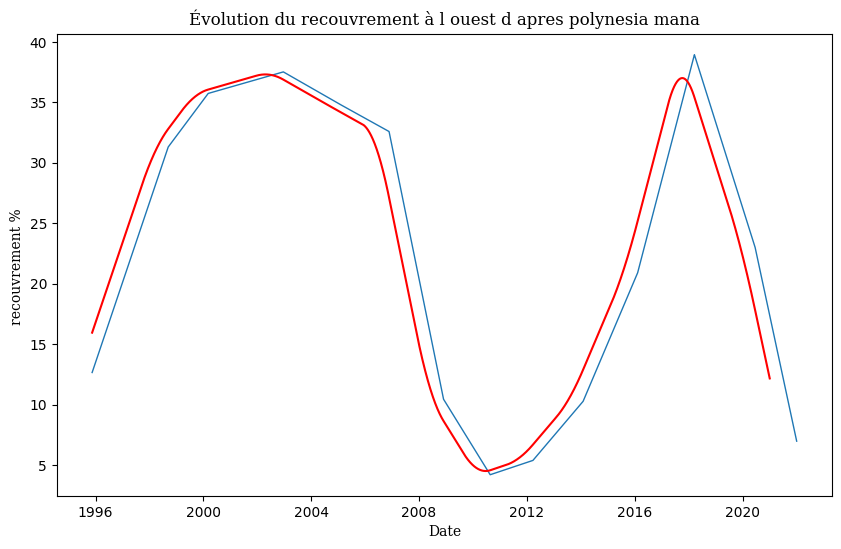

In [66]:
plt.figure(figsize = (10, 6))
plt.plot(x_new_dates, y_new, linewidth = 1)
plt.plot(x_new_dates[:x.shape[0] - window_size+1], x_smoothed, label = 'moyenne glissante', color = 'r')
plt.xlabel('Date', fontfamily = 'serif')
plt.ylabel('recouvrement % ',  fontfamily = 'serif')
plt.title('Évolution du recouvrement à l ouest d apres polynesia mana',  fontfamily = 'serif')

In [67]:
recouvrement_corr = pd.DataFrame({'DateTime':x_new_dates[:x.shape[0] - window_size+1],'recouvrement corr %':x_smoothed})
pmana_w=pmana_w.merge(recouvrement_corr, on='DateTime')
pmana_w.drop(columns=['site','index','dates'], inplace = True)

In [68]:
recouvrement_corr.to_csv('donnees corail/pmana_w.csv', index = False)

# Différenciation des genres

C:\Users\julie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


[]

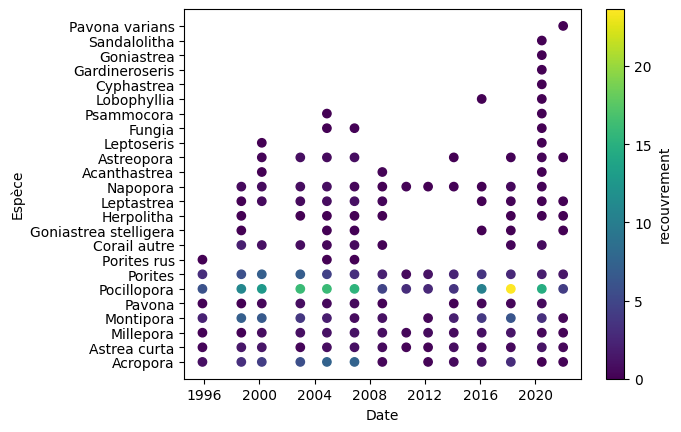

In [69]:
pmana = pd.read_excel('donnees corail/Pmana.xlsx')
pmana.replace(-99,np.nan,inplace=True)
pmana=pmana[pmana['île'].isin(['moorea','Moorea'])]
pmana['date'] = pmana['date'].astype('datetime64[ns]')
pmana_a = pmana[pmana['genre'].isin(['Algue Halimeda','Algue Asparagopsis','Algue autre','Algue Turbinaria','Algue Lobophora','Algue Padina',' Algue Dictyota'])]
pmana= pmana[~pmana['genre'].isin(['Algue Halimeda','Algue Asparagopsis','Algue autre','Algue Turbinaria','Algue Lobophora','Algue Padina',' Algue Dictyota'])]
pmana=pmana.groupby(['site','date','n° quadrat','genre'])['recouvrement %'].sum().reset_index()
pmana=pmana.groupby(['site','date','genre'])['recouvrement %'].mean().reset_index()
pmana_n=pmana[(pmana['site']=='e2b')|(pmana['site']=='tiahura34')].reset_index()
pmana_n['date'] = pmana_n['date'].astype('datetime64[ns]')
pmana_n = pmana_n.rename(columns={'date':'DateTime'})
pmana_w=pmana[pmana['site']=='haapiti'].reset_index()
pmana_w['date'] = pmana_w['date'].astype('datetime64[ns]')
pmana_w = pmana_w.rename(columns={'date':'DateTime'})
plt.scatter(pmana_w['DateTime'],pmana_w['genre'],c=pmana_w['recouvrement %'])
plt.colorbar(label="recouvrement")
plt.xlabel("Date")
plt.ylabel("Espèce")
plt.plot()

[]

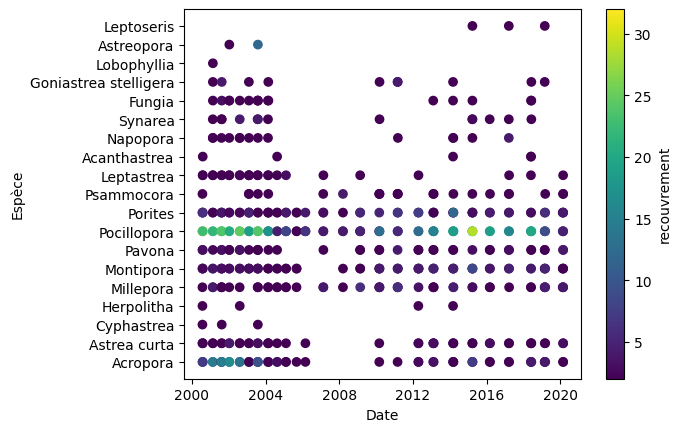

In [70]:
amp = pd.read_excel('donnees corail/mpa2.xlsx')
amp.replace(-99,np.nan,inplace=True)
amp['recouvrement %']=amp['proportion']*100
amp.drop(columns=['proportion'],inplace=True)
amp=amp[amp['Substrate'].isin(['Montipora', 'Porites','Acropora', 'Leptastrea', 'Pocillopora' ,'Pavona','Millepora' ,'Astrea curta', 'Psammocora','Astreopora', 'Herpolitha','Fungia' ,'Acanthastrea'
 ,'Cyphastrea', 'Synarea' ,'Napopora' ,'Goniastrea stelligera','Gardineroseris' ,'Lobophyllia', 'Corail non identifié','Coscinaraea', 'Leptoseris', 'Corail mou' ,'pocillopora'])]
amp=amp.groupby(['Date','Transect','Habitat','Marine Area','Substrate'])['recouvrement %'].sum().reset_index()
amp=amp.groupby(['Marine Area','Date','Habitat','Substrate'])['recouvrement %'].mean().reset_index()


amp_n=amp[(amp['Marine Area']=='Tiahura')|(amp['Marine Area']=='Entre 2 baies')|(amp['Marine Area']=='Pihaena')|(amp['Marine Area']=='Aroa')]

amp_nb=amp_n[amp_n['Habitat']=='Barrier reef'].reset_index()
amp_nb['DC coral']=amp['recouvrement %'].diff()
amp_nb['Date'] = amp_nb['Date'].astype('datetime64[ns]')
amp_nb = amp_nb.rename(columns={'Date':'DateTime'})

amp_no=amp_n[amp_n['Habitat']=='Outer slope'].reset_index()
amp_no['DC coral']=amp['recouvrement %'].diff()
amp_no['Date'] = amp_no['Date'].astype('datetime64[ns]')
amp_no = amp_no.rename(columns={'Date':'DateTime','Substrate':'genre'})
amp_no=amp_no.groupby(['DateTime','genre'])['recouvrement %'].mean().reset_index()

amp_nf=amp_n[amp_n['Habitat']=='Fringing reef'].reset_index()
amp_nf['DC coral']=amp['recouvrement %'].diff()
amp_nf['Date'] = amp_nf['Date'].astype('datetime64[ns]')
amp_nf = amp_nf.rename(columns={'Date':'DateTime'})

amp_w=amp[(amp['Marine Area']=='Gendron')|(amp['Marine Area']=='Tetaiuo')|(amp['Marine Area']=='Taotaha')|(amp['Marine Area']=='Haapiti')]

amp_wb=amp_w[amp_w['Habitat']=='Barrier reef'].reset_index()
amp_wb['DC coral']=amp['recouvrement %'].diff()
amp_wb['Date'] = amp_wb['Date'].astype('datetime64[ns]')
amp_wb = amp_wb.rename(columns={'Date':'DateTime'})

amp_wo=amp_w[amp_w['Habitat']=='Outer slope'].reset_index()
amp_wo['DC coral']=amp['recouvrement %'].diff()
amp_wo['Date'] = amp_wo['Date'].astype('datetime64[ns]')
amp_wo = amp_wo.rename(columns={'Date':'DateTime','Substrate':'genre'})
amp_wo=amp_wo.groupby(['DateTime','genre'])['recouvrement %'].mean().reset_index()

amp_wf=amp_w[amp_w['Habitat']=='Fringing reef'].reset_index()
amp_wf['DC coral']=amp['recouvrement %'].diff()
amp_wf['Date'] = amp_wf['Date'].astype('datetime64[ns]')
amp_wf = amp_wf.rename(columns={'Date':'DateTime'})

amp_e=amp[(amp['Marine Area']=='Maatea')|(amp['Marine Area']=='Afareaitu')|(amp['Marine Area']=='Motu Ahi')|(amp['Marine Area']=='Nuarei')|(amp['Marine Area']=='Temae')]

amp_eb=amp_e[amp_e['Habitat']=='Barrier reef'].reset_index()
amp_eb['DC coral']=amp['recouvrement %'].diff()
amp_eb['Date'] = amp_eb['Date'].astype('datetime64[ns]')
amp_eb = amp_eb.rename(columns={'Date':'DateTime'})

amp_eo=amp_e[amp_e['Habitat']=='Outer slope'].reset_index()
amp_eo['DC coral']=amp['recouvrement %'].diff()
amp_eo['Date'] = amp_eo['Date'].astype('datetime64[ns]')
amp_eo = amp_eo.rename(columns={'Date':'DateTime','Substrate':'genre'})
amp_eo=amp_eo.groupby(['DateTime','genre'])['recouvrement %'].mean().reset_index()

amp_ef=amp_e[amp_e['Habitat']=='Fringing reef'].reset_index()
amp_ef['DC coral']=amp['recouvrement %'].diff()
amp_ef['Date'] = amp_ef['Date'].astype('datetime64[ns]')
amp_ef = amp_ef.rename(columns={'Date':'DateTime'})
plt.scatter(amp_eo['DateTime'],amp_eo['genre'],c=amp_eo['recouvrement %'])
plt.colorbar(label="recouvrement")
plt.xlabel("Date")
plt.ylabel("Espèce")
plt.plot()

# Identifier seuils

Acropora []


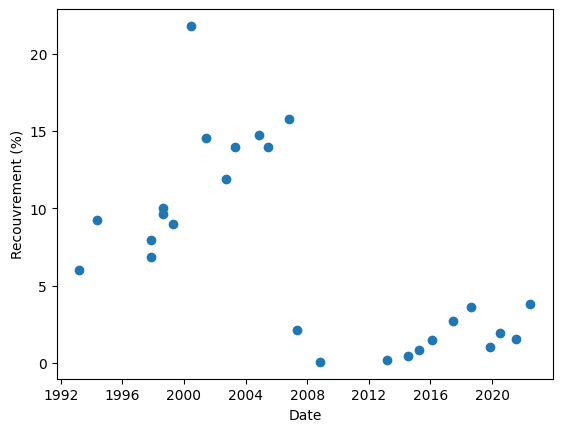

Astrea curta [0.18518518518518517]


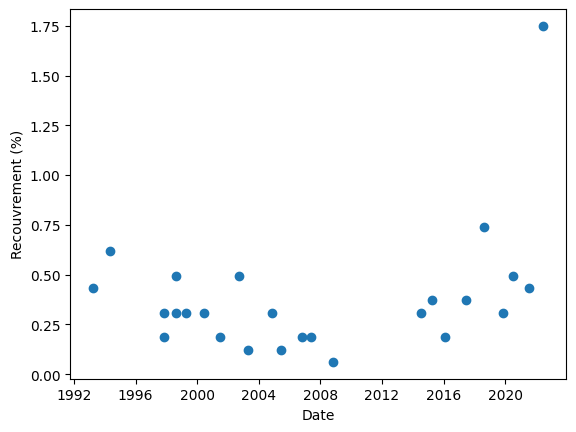

Corail autre []


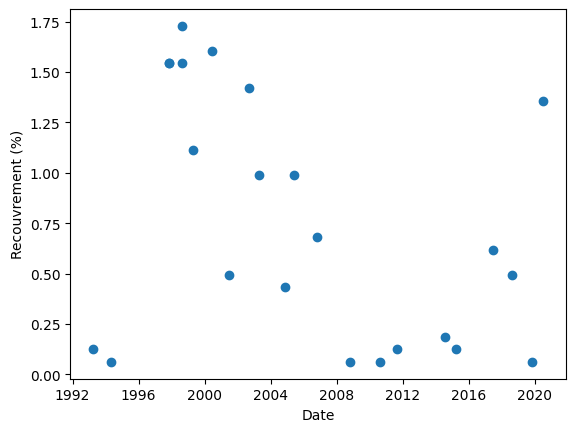

Fungia [0.12345679012345678]


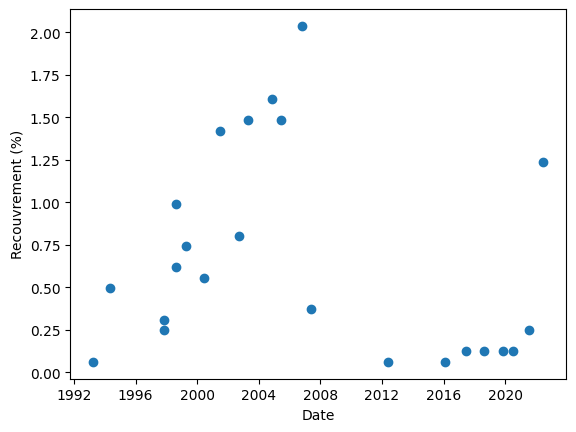

Montipora []


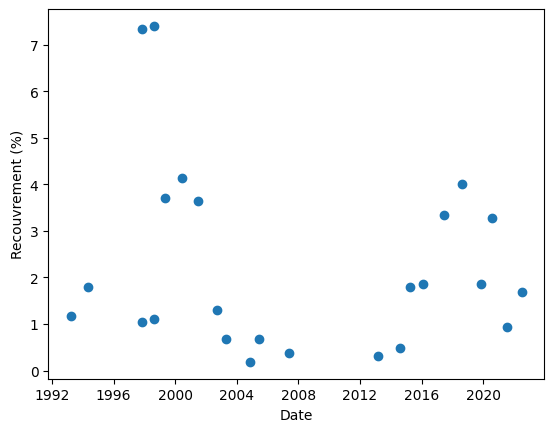

Pocillopora []


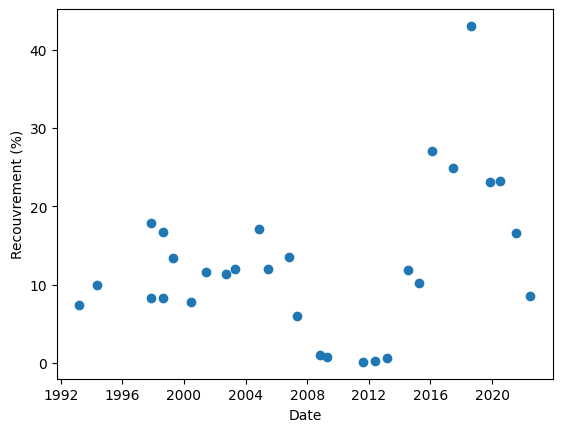

Porites []


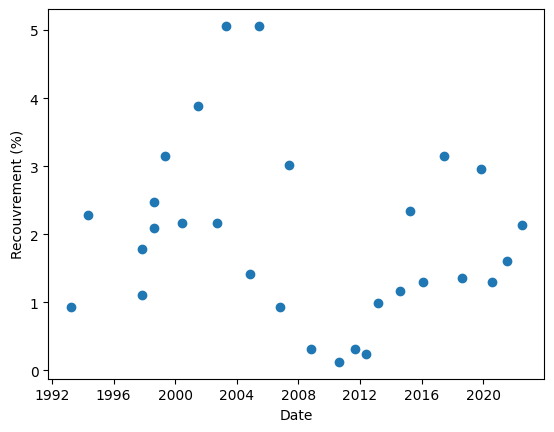

Gardineroseris []


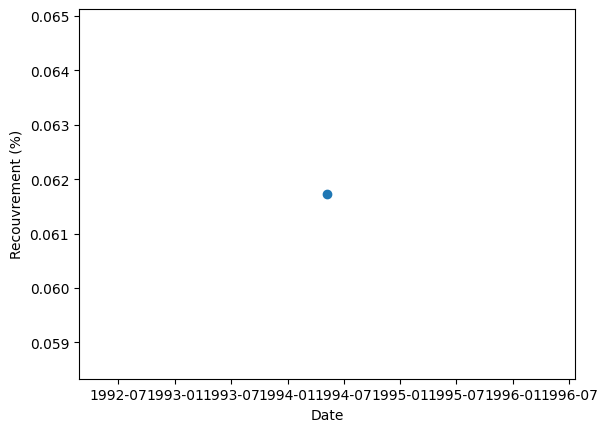

Goniastrea stelligera [0.43209876543209874]


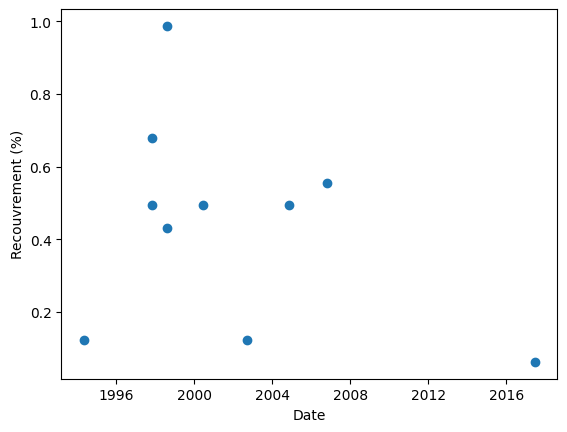

Pavona []


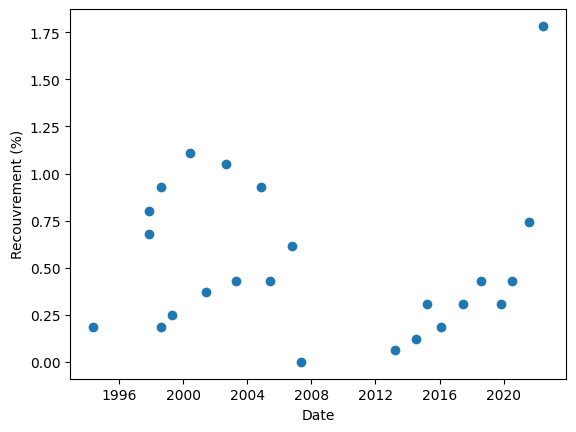

Porites rus []


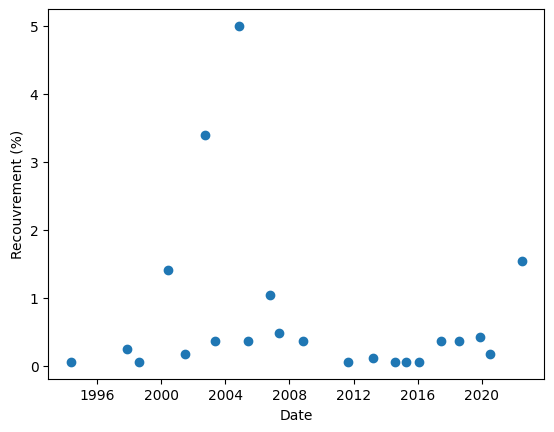

Acanthastrea [0.12345679012345678]


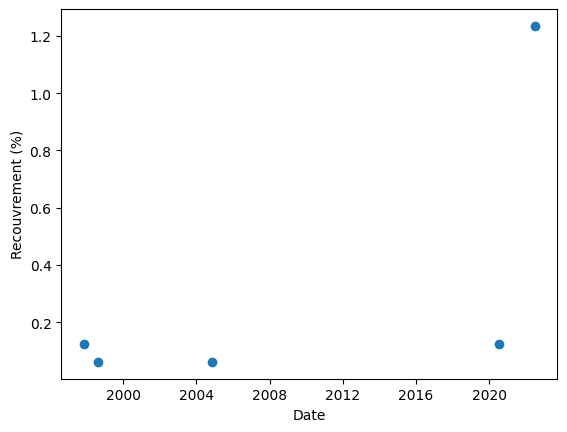

Herpolitha [0.18518518518518517]


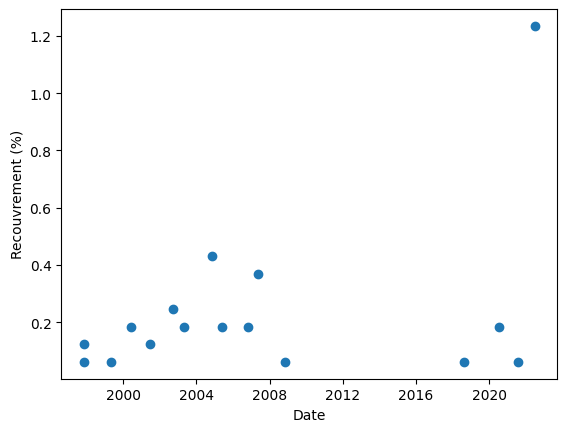

Leptastrea [0.9259259259259259, 0.06172839506172839]


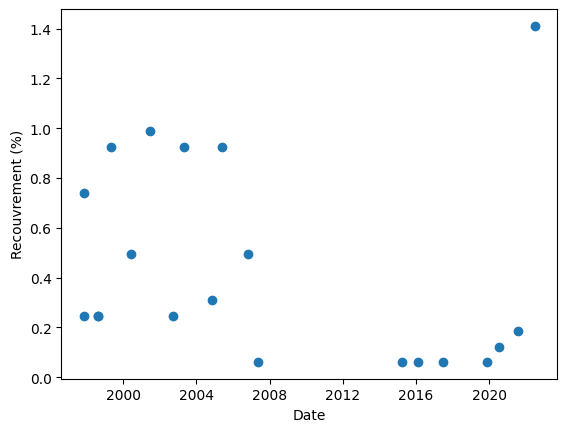

Napopora [0.18518518518518517]


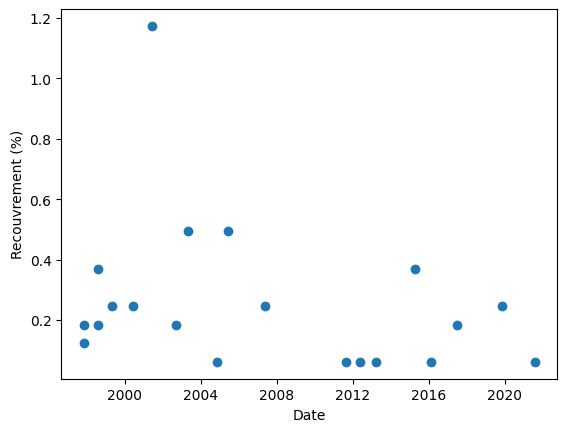

Astreopora [0.06172839506172839]


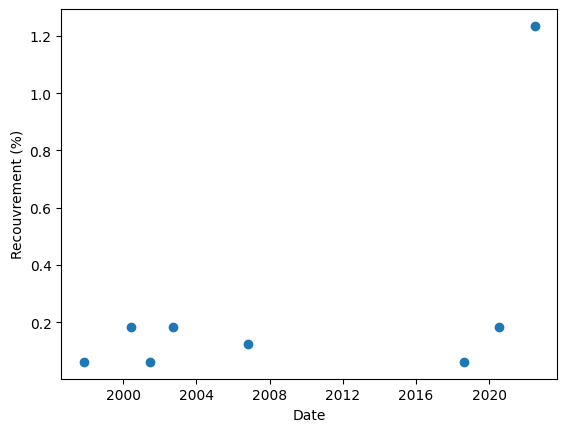

Leptoseris []


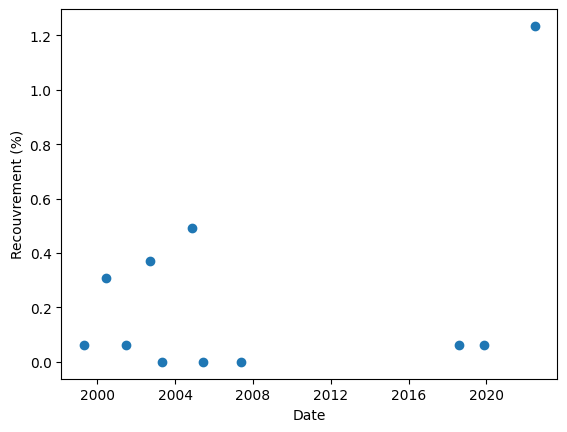

Psammocora [0.06172839506172839]


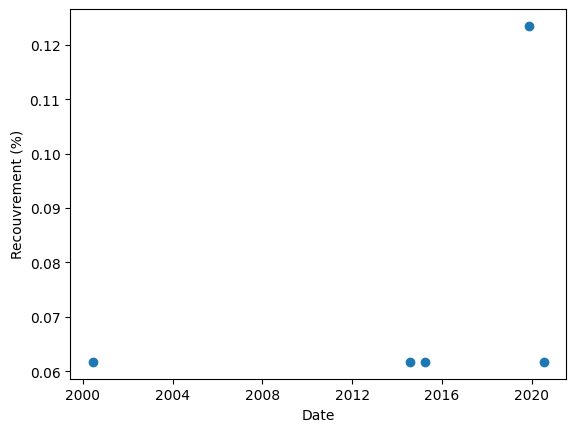

Lobophyllia []


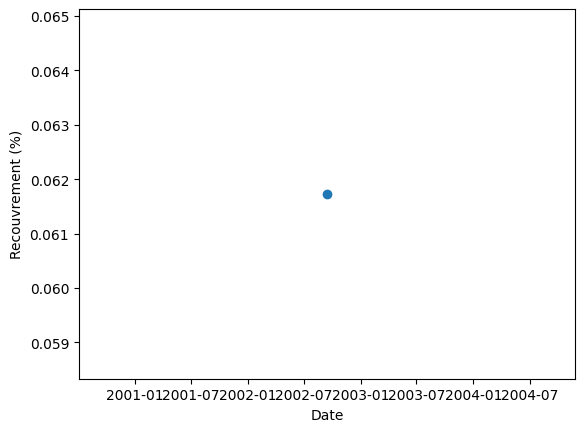

Sandalolitha []


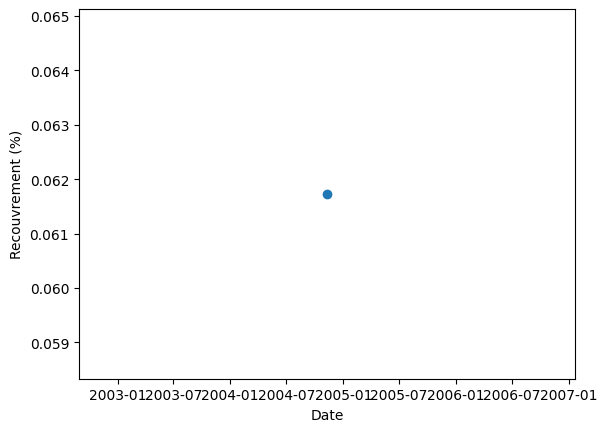

Millepora []


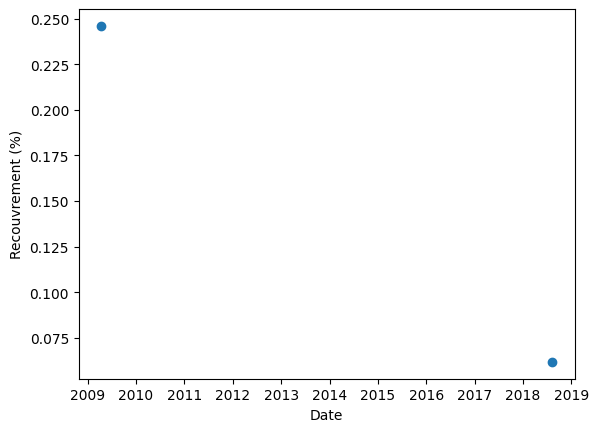

Cyphastrea []


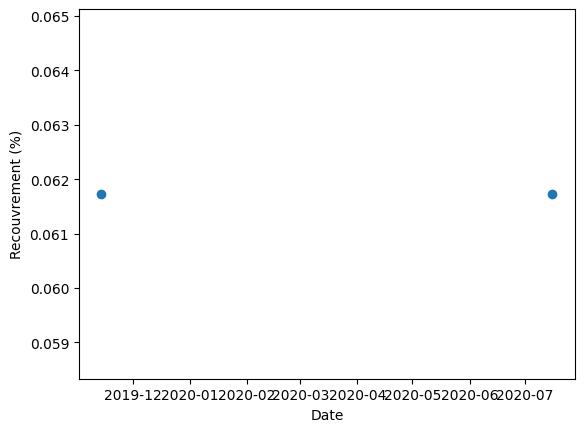

In [75]:
for espece in pmana_n['genre'].unique():
    data_espece = pmana_n[pmana_n['genre'] == espece].copy()
    data_espece.loc[:, espece + 'der'] = data_espece['recouvrement %'].diff()
    count_min = 0
    l_seuil = []
    for i in range (1,data_espece.shape[0]):
        if np.abs(data_espece[espece+'der'].values[i])<0.1:
            count_min +=1
        else :
            count_min = 0

        if (count_min ==3) :
            if data_espece['recouvrement %'].values[i]!=0:
                l_seuil.append(data_espece['recouvrement %'].values[i])
            count_min=0
    print(espece,l_seuil)
    plt.scatter(data_espece['DateTime'],data_espece['recouvrement %'])
    plt.xlabel('Date')
    plt.ylabel('Recouvrement (%)')
    plt.show()

Acropora [2.0, 2.6666666666666665, 2.0]


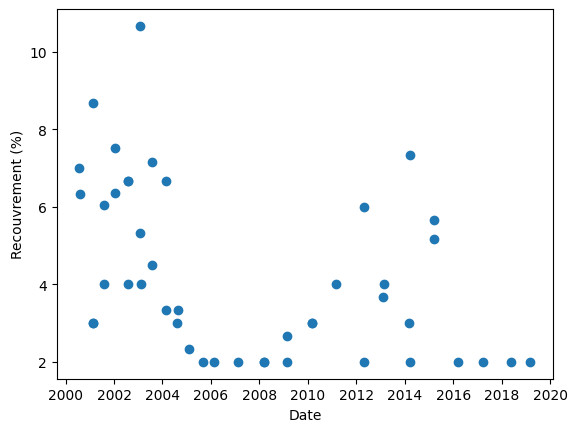

Astrea curta [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


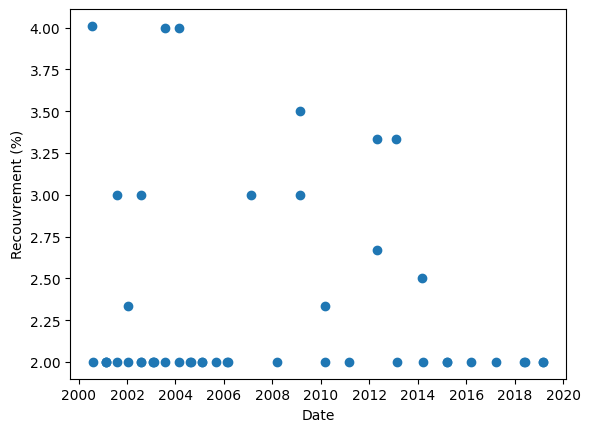

Astreopora [2.0, 2.0]


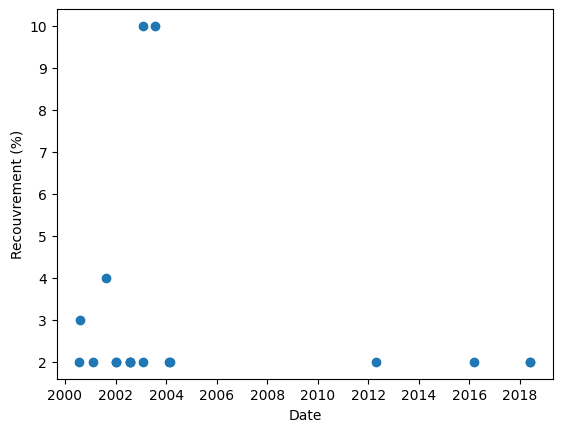

Cyphastrea [2.0]


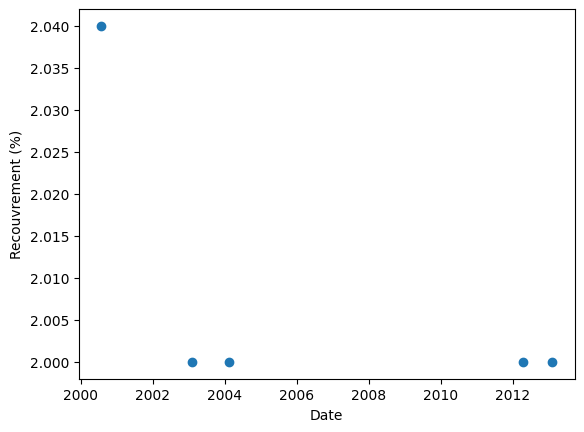

Leptastrea [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


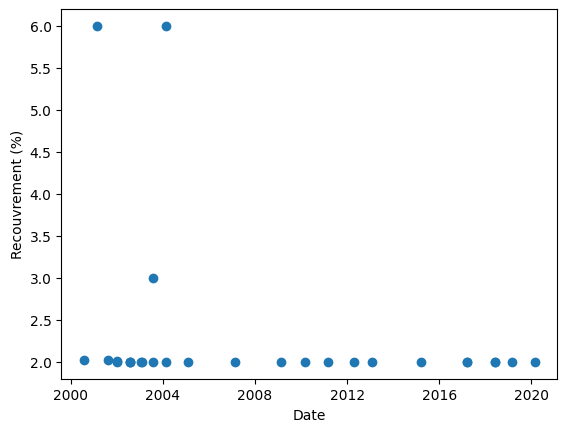

Montipora [5.333333333333333, 2.0]


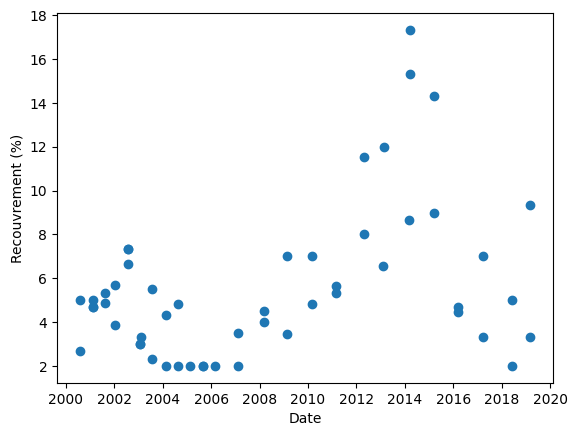

Pavona [2.0, 2.0, 2.0, 2.0]


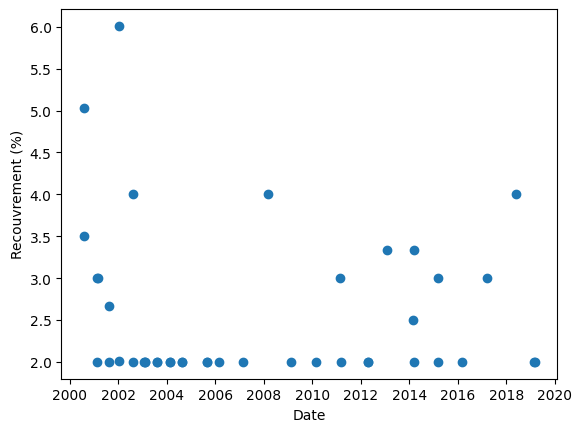

Pocillopora []


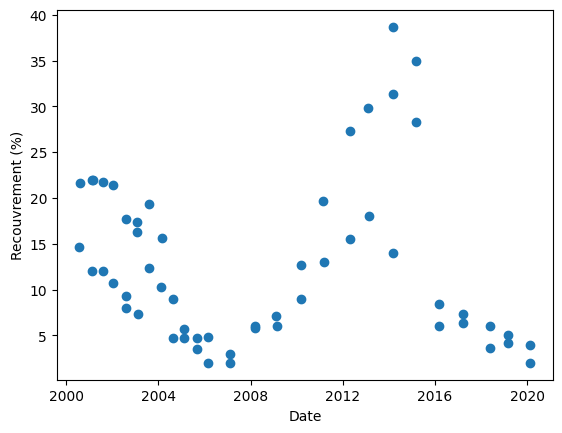

Porites [3.833333333333333, 3.3333333333333335]


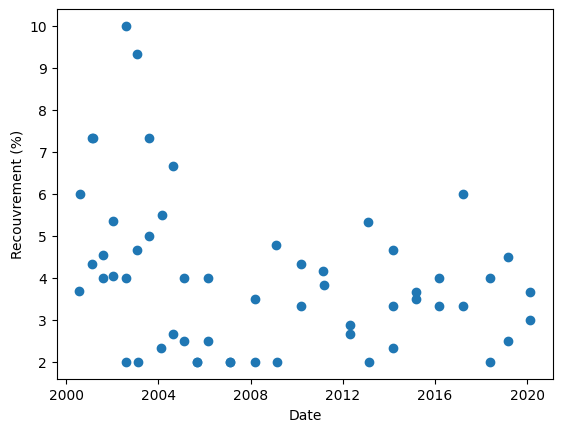

Millepora [2.0, 2.0, 2.0]


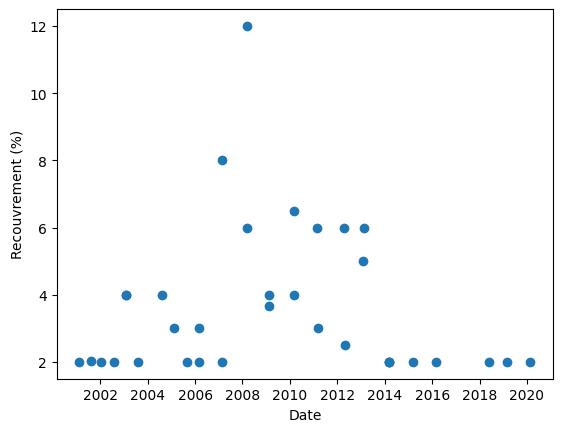

Psammocora [2.0, 2.0]


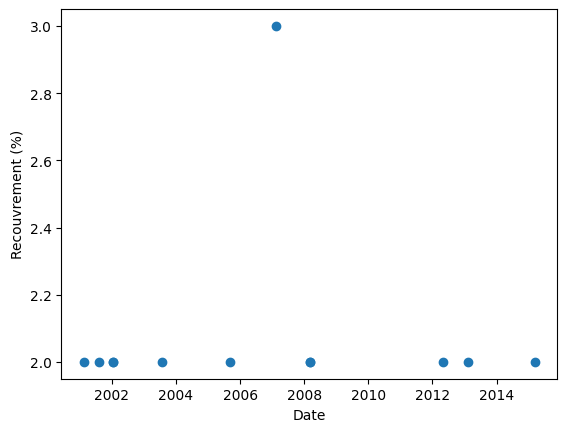

Lobophyllia []


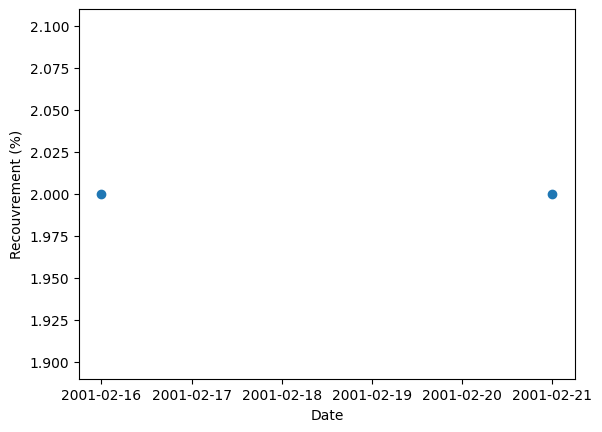

Napopora [2.0, 2.0]


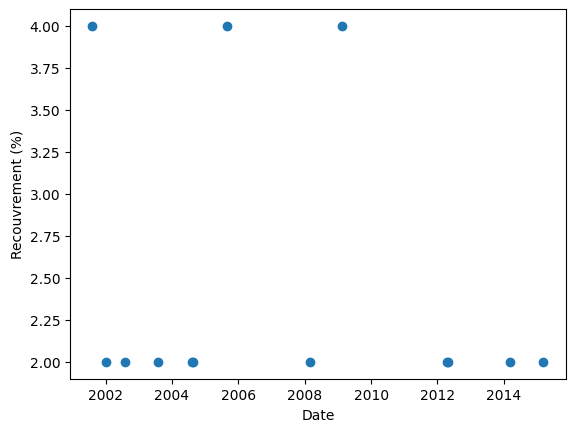

Acanthastrea [2.0]


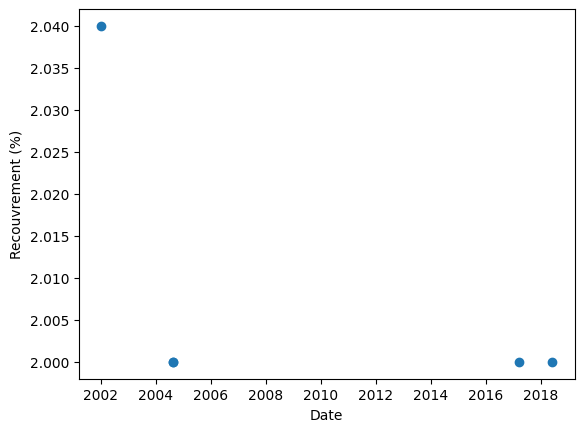

Synarea [2.0]


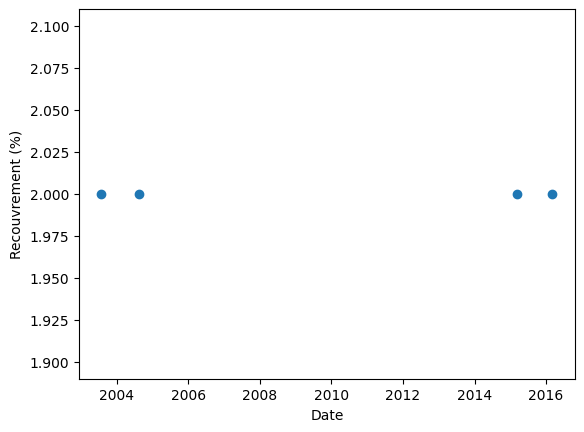

Corail non identifié []


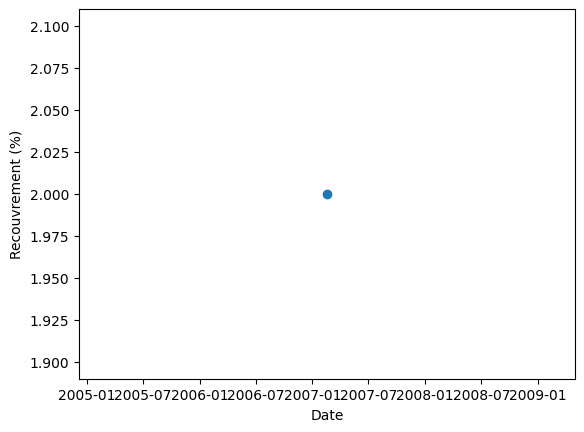

Leptoseris []


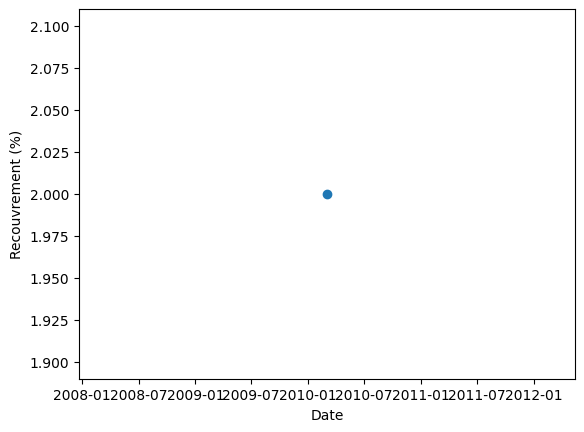

Goniastrea stelligera []


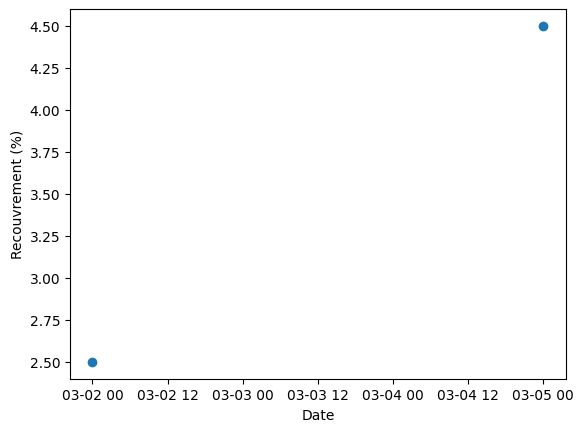

In [76]:
for espece in amp_wo['genre'].unique():
    data_espece = amp_wo[amp_wo['genre'] == espece].copy()
    data_espece.loc[:, espece + 'der'] = data_espece['recouvrement %'].diff()
    count_min = 0
    l_seuil = []
    for i in range (1,data_espece.shape[0]):
        if np.abs(data_espece[espece+'der'].values[i])<1:
            count_min +=1
        else :
            count_min = 0

        if (count_min ==3) :
            if data_espece['recouvrement %'].values[i]!=0:
                l_seuil.append(data_espece['recouvrement %'].values[i])
            count_min=0
    print(espece,l_seuil)
    plt.scatter(data_espece['DateTime'],data_espece['recouvrement %'])
    plt.xlabel('Date')
    plt.ylabel('Recouvrement (%)')
    plt.show()

In [77]:
dico_amp_eo={} # dictionnaire contenant tous les seuils
for espece in amp_eo['genre'].unique():
    dico_amp_eo[espece]=2
dico_amp_eo['Montipora']=3
dico_amp_eo['Pocillopora']=3.8
dico_amp_eo['Porites']=3
dico_amp_eo['Lobophyllia']=2.1
amp_eo['seuil']=2
for i in range (amp_eo.shape[0]):
    amp_eo['seuil'].values[i]=dico_amp_eo[amp_eo['genre'].values[i]]

# Fonction pour calculer le score
def calculate_score(df,ecart):
        ####  détermine la classe à laquelle chaque jour appartient

    #### cette fonction prend les variables suivantes en entrée :
    # df = la dataframe 
    # écart = l'écart maximal accepté pour considérer le recouvrement comme étant égal au recouvrement seuil (en %)
    
    #### et en sortie :
    # scores_df = la dataframe à laquelle on a ajouté une catégorie score
    grouped = df.groupby('DateTime')
    
    # Initialiser une liste pour stocker les scores
    scores = []
    
    # Parcourir chaque groupe
    for name, group in grouped:
        # Calculer le nombre de lignes où la différence entre seuil et recouvrement est inférieure à 5
        score = ((group['seuil'] - group['recouvrement %']).abs() < ecart).sum()
        scores.append({'DateTime': name, 'score': score})
    
    # Retourner les scores sous forme de dataframe
    return pd.DataFrame(scores)

# Calculer les scores
scores_df = calculate_score(amp_eo,1)

# Exporter

In [78]:
scores_df.to_csv('donnees corail/amp_eo_genre.csv', index = False)